In [1]:
import torch
import torch.nn as nn

from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torch'

In [2]:
# Define la arquitectura del modelo
class CustomNet(nn.Module):
    def __init__(self, num_classes=8, is_trained=False):
        super().__init__()
        self.ConvLayer1 = nn.Sequential(
            nn.Conv2d(3, 8, 3),
            nn.Conv2d(8, 16, 3),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        self.ConvLayer2 = nn.Sequential(
            nn.Conv2d(16, 32, 5),
            nn.Conv2d(32, 32, 3),
            nn.MaxPool2d(4),
            nn.ReLU()
        )
        self.ConvLayer3 = nn.Sequential(
            nn.Conv2d(32, 64, 3),
            nn.Conv2d(64, 64, 5),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        self.ConvLayer4 = nn.Sequential(
            nn.Conv2d(64, 128, 5),
            nn.Conv2d(128, 128, 3),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        self.Lin1 = nn.Sequential(nn.Linear(512, 8), nn.Sigmoid())

    def forward(self, x):
        x = self.ConvLayer1(x)
        x = self.ConvLayer2(x)
        x = self.ConvLayer3(x)
        x = self.ConvLayer4(x)
        x = x.view(x.size(0), -1)
        x = self.Lin1(x)
        return x

In [3]:
file = 'models/CustomNet.pth'

In [4]:
loaded_model = CustomNet()

In [5]:
# Cargar el estado_dict personalizado
custom_state_dict = torch.load(file, map_location=torch.device('cpu'))
adjusted_state_dict = {}

for key, value in custom_state_dict['model'].items():
    adjusted_key = key.replace("model.", "")  # Ajusta según sea necesario
    adjusted_state_dict[adjusted_key] = value

In [6]:
# Cargar el estado_dict ajustado en el modelo
loaded_model.load_state_dict(adjusted_state_dict)

<All keys matched successfully>

In [7]:
loaded_model.eval()

CustomNet(
  (ConvLayer1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (ConvLayer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (ConvLayer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (ConvLayer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): 

In [9]:
categories = ['Atelectasis',
'Effusion',
'Infiltration',
'Mass',
'No Finding',
'Nodule',
'Pneumonia',
'Pneumothorax']

In [9]:
# Obtener las clases predichas del modelo (asumiendo que `predicted_classes` es una lista de clases predichas)
# predicted_classes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [10]:
# Crear un diccionario que asocie clases numéricas con categorías
class_dict = {i + 1: category for i, category in enumerate(categories)}

In [11]:
# Obtener las categorías correspondientes a las clases predichas
# predicted_categories = [class_dict[class_num] for class_num in predicted_classes]

In [45]:
IMAGE_SIZE = 224
# Define la función de preprocesamiento para la imagen de prueba
def preprocess_test_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    return transform(image).unsqueeze(0)  # Agregar una dimensión de lote

In [46]:
# Ruta de la imagen de prueba
test_image_path = 'test_labs/00000820_003.png'  # Reemplaza con la ruta de tu imagen de prueba

In [47]:
# Cargar la imagen y preprocesarla
input_image = preprocess_test_image(test_image_path)

In [48]:
# Realizar la predicción
with torch.no_grad():
    output = loaded_model(input_image)

In [49]:
# Obtener las predicciones
predictions = torch.sigmoid(output[0]).numpy()

In [50]:
predictions

array([0.5459258 , 0.5119704 , 0.50360525, 0.5068215 , 0.5125287 ,
       0.5031973 , 0.50000006, 0.50546575], dtype=float32)

In [51]:
# Mostrar las predicciones
threshold = 0.5
print("Predicciones para cada clase:")
for i, prob in enumerate(predictions):
    class_name = class_dict[i + 1]  # Obtener el nombre de la clase desde el diccionario
    print(f"{class_name}: {prob:.4f}")

Predicciones para cada clase:
Atelectasis: 0.5459
Effusion: 0.5120
Infiltration: 0.5036
Mass: 0.5068
No Finding: 0.5125
Nodule: 0.5032
Pneumonia: 0.5000
Pneumothorax: 0.5055


In [52]:
# Puedes ajustar esto según tus clases específicas y definir umbrales para clasificar las predicciones
# threshold = 0.5
# predicted_class = [i + 1 for i, prob in enumerate(predictions) if prob > threshold]

# print("\nClases predichas con probabilidad superior al umbral:")
# print(predicted_class)

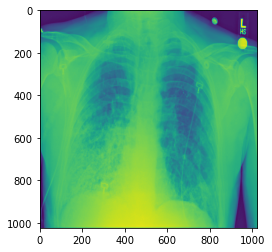

In [53]:
# Visualizar la imagen de prueba
image = Image.open(test_image_path)
plt.imshow(image)
# plt.title(f"Clases predichas: {predicted_classes}")
plt.show()